### MACHINE LEARNING FOR FINANCIAL MARKETS

TOPIC: IMPROVING TIME SERIES FORECASTING WITH SYNTHETIC DATA

Tools used: LSTM Neural Networks and GANs 

In [554]:
import pandas as pd


In [555]:
#load the dataset (data from 02/20/2015 to 02/19/2025)
path = '/Users/francescavasta/Desktop/MSFT historical data.csv'
df = pd.read_csv(path)

df

,Date,Close/Last,Volume,Open,High,Low
0,02/19/2025,$414.77,24114200,$407.88,$415.49,$407.65
1,02/18/2025,$409.64,21423050,$408.00,$410.597,$406.50
2,02/14/2025,$408.43,22758460,$407.79,$408.91,$405.88
3,02/13/2025,$410.54,23891730,$407.00,$411.00,$406.36
4,02/12/2025,$409.04,19121730,$407.21,$410.75,$404.3673
...,...,...,...,...,...,...
2510,02/26/2015,$44.055,26524300,$43.99,$44.23,$43.89
2511,02/25/2015,$43.99,29749090,$43.95,$44.09,$43.80
2512,02/24/2015,$44.09,25262080,$44.15,$44.30,$43.92
2513,02/23/2015,$44.15,32510550,$43.70,$44.19,$43.65


In [556]:
df = df[['Date', 'Close/Last']]

In [557]:
df.info()
#we see that we have a problem with the date format because it is a string
#also the stock value is a string

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2515 entries, 0 to 2514
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Date        2515 non-null   object
 1   Close/Last  2515 non-null   object
dtypes: object(2)
memory usage: 39.4+ KB


In [558]:
import datetime

def str_to_datetime(s):
    split = s.split('/')
    month, day, year = int(split[0]), int(split[1]), int(split[2])
    return datetime.datetime(year=year, month = month, day=day)

#testing the function
datetime_object = str_to_datetime('02/20/2015')
datetime_object


datetime.datetime(2015, 2, 20, 0, 0)

In [559]:
df['Date'] = df['Date'].apply(str_to_datetime)

/var/folders/ls/mj9skg6x7j38ls1ncwhc9s400000gn/T/ipykernel_2838/3172778012.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Date'] = df['Date'].apply(str_to_datetime)


In [560]:
df["Close/Last"] = df["Close/Last"].str.replace(r"\$", "", regex=True) # to remove $
df["Close/Last"] = pd.to_numeric(df["Close/Last"], errors="coerce")
df


/var/folders/ls/mj9skg6x7j38ls1ncwhc9s400000gn/T/ipykernel_2838/1857268964.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Close/Last"] = df["Close/Last"].str.replace(r"\$", "", regex=True) # to remove $
/var/folders/ls/mj9skg6x7j38ls1ncwhc9s400000gn/T/ipykernel_2838/1857268964.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Close/Last"] = pd.to_numeric(df["Close/Last"], errors="coerce")


,Date,Close/Last
0,2025-02-19,414.770
1,2025-02-18,409.640
2,2025-02-14,408.430
3,2025-02-13,410.540
4,2025-02-12,409.040
...,...,...
2510,2015-02-26,44.055
2511,2015-02-25,43.990
2512,2015-02-24,44.090
2513,2015-02-23,44.150


In [561]:
df['Close/Last'].astype(float)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2515 entries, 0 to 2514
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Date        2515 non-null   datetime64[ns]
 1   Close/Last  2515 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 39.4 KB


In [562]:
#we prefer to have our data ordered chronologically from past to future 
df = df.sort_values(by="Date", ascending=True)
df = df.reset_index(drop=True)

df


,Date,Close/Last
0,2015-02-20,43.855
1,2015-02-23,44.150
2,2015-02-24,44.090
3,2015-02-25,43.990
4,2015-02-26,44.055
...,...,...
2510,2025-02-12,409.040
2511,2025-02-13,410.540
2512,2025-02-14,408.430
2513,2025-02-18,409.640


In [563]:
#now we want to remove the index and make the date itslef as the index
df.index = df.pop('Date')
df

,Close/Last
Date,
2015-02-20,43.855
2015-02-23,44.150
2015-02-24,44.090
2015-02-25,43.990
2015-02-26,44.055
...,...
2025-02-12,409.040
2025-02-13,410.540
2025-02-14,408.430


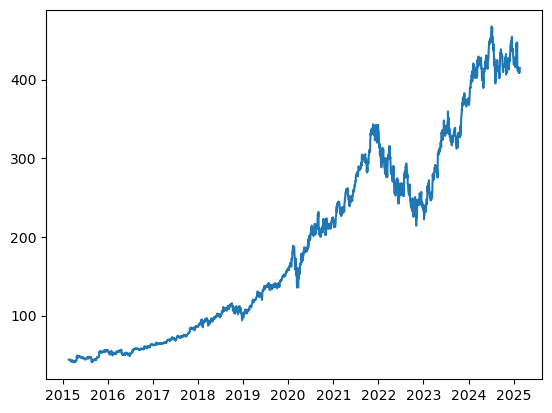

In [564]:
import matplotlib.pyplot as plt

plt.plot(df.index, df['Close/Last'])

In [565]:
import numpy as np

#The function scrolls the DataFrame and creates time sequences (windows) of past data 
# to predict the future data (target).

def df_to_windowed_df (dataframe, first_date_str,last_date_str, n = 5): 
    first_date = str_to_datetime(first_date_str)
    last_date = str_to_datetime(last_date_str)

    target_date = first_date

    dates = []
    X,Y = [], []

    last_time = False
    while True:
        df_subset = dataframe.loc[:target_date].tail(n+1)

        if len(df_subset) != n+1:
            print(f'Error: Window of size {n} is too large for date')
            return
    
        values = df_subset['Close/Last'].to_numpy()
        x, y = values [:-1], values [-1]

        dates.append(target_date)
        X.append(x)
        Y.append(y)

        # Find the next date
        next_week = dataframe.loc[target_date:target_date+datetime.timedelta(days=7)]
        next_datetime_str=str(next_week.head(2).tail(1).index.values[0])
        next_date_str = next_datetime_str.split('T')[0]
        year_month_day = next_date_str.split('-')
        year, month, day = year_month_day
        next_date = datetime.datetime(day=int(day), month=int(month), year=int(year))
        
        # Find the next date
        #next_date = target_date + datetime.timedelta(days=1)  # Assuming the next day is the next target date
        
        #target_date = next_date

        if last_time: 
            break 

        target_date = next_date
        
        if target_date == last_date:
            last_time = True
        

    ret_df = pd.DataFrame({})
    ret_df['Target Date'] = dates

    X = np.array (X)
    for i in range (0,n):
        X[:, i]
        ret_df[f'Target - {n-i}'] = X[:, i]
    
    ret_df['Target'] = Y 

    return ret_df    

In [566]:
#Start day second time around: 
windowed_df = df_to_windowed_df(df,'02/27/2015', '02/19/2025' ,n = 5)

windowed_df

,Target Date,Target - 5,Target - 4,Target - 3,Target - 2,Target - 1,Target
0,2015-02-27,43.855,44.150,44.090,43.990,44.055,43.850
1,2015-03-02,44.150,44.090,43.990,44.055,43.850,43.880
2,2015-03-03,44.090,43.990,44.055,43.850,43.880,43.280
3,2015-03-04,43.990,44.055,43.850,43.880,43.280,43.055
4,2015-03-05,44.055,43.850,43.880,43.280,43.055,43.110
...,...,...,...,...,...,...,...
2505,2025-02-12,413.290,415.820,409.750,412.220,411.440,409.040
2506,2025-02-13,415.820,409.750,412.220,411.440,409.040,410.540
2507,2025-02-14,409.750,412.220,411.440,409.040,410.540,408.430
2508,2025-02-18,412.220,411.440,409.040,410.540,408.430,409.640


In [567]:
#PREPARE THE DATA FOR TENSOR FLOW AND UNIVARIATE FORECASTING

def windowed_df_to_date_X_y (windowed_dataframe):
    df_as_np = windowed_dataframe.to_numpy()

    dates = df_as_np[:, 0]

    middle_matrix  = df_as_np [:, 1:-1] #to take only the "Target-n" columns
    #middle matrix is not the final input matrix

    X = middle_matrix.reshape((len(dates),middle_matrix.shape[1], 1)) #"1" because it is univariate forecasting
    #if we used also the volume variable, then we would need to change the number

    Y = df_as_np[:, -1]

    return dates, X.astype(np.float32), Y.astype(np.float32)

dates, X, y = windowed_df_to_date_X_y(windowed_df)

dates.shape, X.shape, y.shape

((2510,), (2510, 5, 1), (2510,))

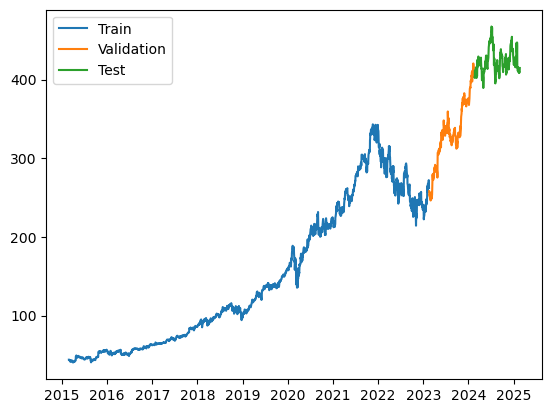

In [568]:
#we need to split the data
#with time series we can't do random splittings because the cronological order is important, so we use the quantiles

q_80 = int(len(dates)*.8)
q_90 = int(len(dates)*.9)

dates_train, X_train, y_train = dates[:q_80], X[:q_80], y[:q_80]
dates_val, X_val, y_val = dates[q_80:q_90], X[q_80:q_90], y[q_80:q_90]
dates_test, X_test, y_test = dates[q_90:], X[q_90:], y[q_90:] #from q_90 onwards

plt.plot(dates_train, y_train)
plt.plot(dates_val, y_val)
plt.plot(dates_test, y_test)

plt.legend(['Train', 'Validation', 'Test'])

In [569]:
#!pip install tensorflow

from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam #adam is the optimizer we are going to use
from tensorflow.keras import layers

In [570]:
# Inizializza e applica gli scaler una sola volta
X_scaler = MinMaxScaler()
y_scaler = MinMaxScaler()

# Normalizza i dati nel windowed_df
windowed_df.iloc[:, 1:-1] = X_scaler.fit_transform(windowed_df.iloc[:, 1:-1])  # Normalizza X
windowed_df.iloc[:, -1] = y_scaler.fit_transform(windowed_df.iloc[:, -1].values.reshape(-1, 1))  # Normalizza y

# Converti in date, X, y
dates, X, y = windowed_df_to_date_X_y(windowed_df)

In [571]:
model = Sequential([layers.Input((5, 1)), # we need to specify the shape of the input
                    layers.LSTM(64), #the higher is this number, the higher is the risk of overfitting
                    layers.Dense(32, activation ='relu'),
                    layers.Dense(32, activation ='relu'),
                    layers.Dense(1) #by default the output is linear
                    ])

model.compile(loss= tf.keras.losses.Huber(delta=0.1), 
              optimizer=Adam(learning_rate=0.0001),
              metrics = ['mean_absolute_error'])

model.fit(X_train,y_train, validation_data=(X_val, y_val), epochs = 100)

Epoch 1/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 14.4856 - mean_absolute_error: 144.9063 - val_loss: 33.2402 - val_mean_absolute_error: 332.4519
Epoch 2/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 14.6373 - mean_absolute_error: 146.4234 - val_loss: 33.1646 - val_mean_absolute_error: 331.6964
Epoch 3/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 14.4954 - mean_absolute_error: 145.0037 - val_loss: 33.0768 - val_mean_absolute_error: 330.8175
Epoch 4/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 14.5925 - mean_absolute_error: 145.9746 - val_loss: 32.8633 - val_mean_absolute_error: 328.6831
Epoch 5/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 13.8760 - mean_absolute_error: 138.8099 - val_loss: 32.5096 - val_mean_absolute_error: 325.1458
Epoch 6/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 13.3552 - mean_absolute_error: 133.6025 - val_loss: 31.8791 - val_mean_absolute_error: 318.8410
Epoch 7/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 12.4902 - m

63/63 ━━━━━━━━━━━━━━━━━━━━ 4s 66ms/step


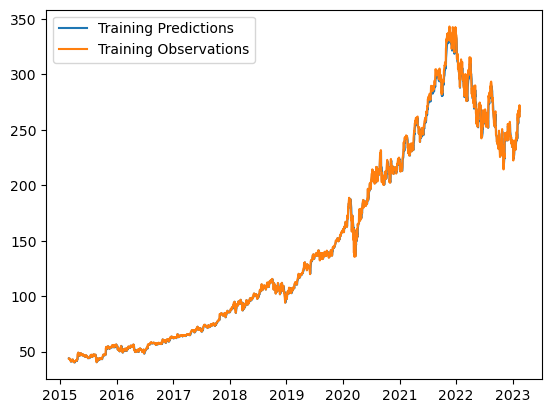

In [572]:
train_predictions = model.predict(X_train).flatten ()
plt.plot (dates_train, train_predictions) 
plt.plot (dates_train, y_train)
plt. legend (['Training Predictions', 'Training Observations'])

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


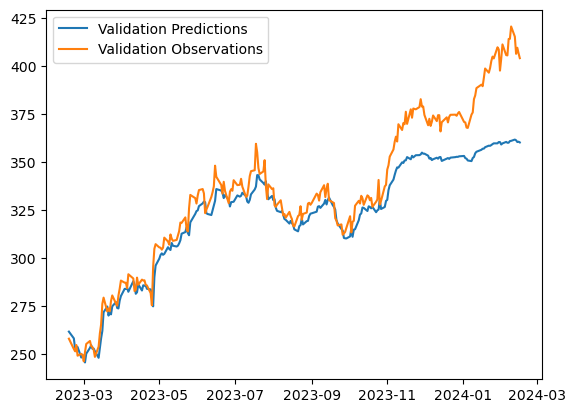

In [573]:
val_predictions = model.predict (X_val).flatten ()
plt.plot (dates_val, val_predictions) 
plt.plot (dates_val, y_val)
plt. legend(['Validation Predictions', 'Validation Observations'])

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


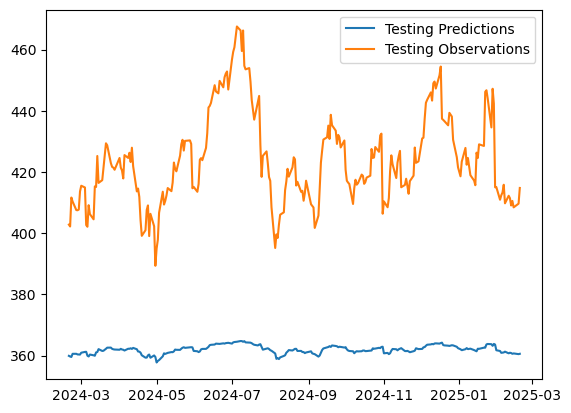

In [574]:
test_predictions = model.predict(X_test).flatten()
#test_predictions = scaler_y.inverse_transform(test_predictions.reshape(-1, 1))


plt.plot(dates_test, test_predictions, label='Testing Predictions')
plt.plot(dates_test, y_test, label='Testing Observations')
plt.legend()
plt.show()

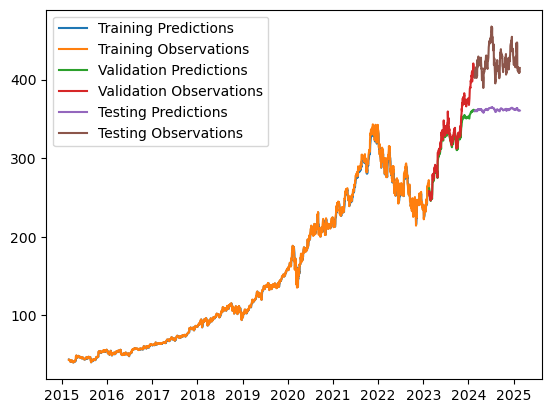

In [575]:
plt.plot (dates_train, train_predictions) 
plt.plot (dates_train, y_train) 
plt.plot (dates_val, val_predictions) 
plt.plot (dates_val, y_val) 
plt.plot (dates_test, test_predictions) 
plt.plot (dates_test, y_test) 
plt. legend(['Training Predictions', 
             'Training Observations',
             'Validation Predictions',
             'Validation Observations',
             'Testing Predictions',
             'Testing Observations'])

## it seems that the model is not good at extrapolating, which means predicting data out of its range! - We could use Synthetic data :)


## GENERATIVE ADVERSIAL NETWORK

In [576]:
import tensorflow as tf
from tensorflow.keras import layers, models
import numpy as np
import matplotlib.pyplot as plt


In [577]:
def build_generator(window_size):
    model = models.Sequential()
    model.add(layers.Input(shape=(window_size, 1)))  # Shape of the input (e.g., 5 time steps)
    model.add(layers.LSTM(64, return_sequences=True))
    model.add(layers.LSTM(128, return_sequences=False))
    model.add(layers.Dense(window_size))  # Generate the same number of data points as the window size
    model.add(layers.Activation('tanh'))  # Activation to keep the output in the range -1 to 1
    model.add(layers.Reshape((window_size, 1)))  # Add this to ensure the output is (batch_size, window_size, 1)
    return model

In [578]:
def build_generator(window_size):
    model = models.Sequential()
    model.add(layers.Input(shape=(window_size, 1)))  # Shape of the input (e.g., 5 time steps)
    model.add(layers.LSTM(64, return_sequences=True))
    model.add(layers.LSTM(128, return_sequences=False))
    model.add(layers.Dense(window_size))  # Generate the same number of data points as the window size
    model.add(layers.ReLU())  # Cambia tanh con ReLU
    model.add(layers.Reshape((window_size, 1)))  # Add this to ensure the output is (batch_size, window_size, 1)
    return model

In [579]:
def build_discriminator(window_size):
    model = models.Sequential()
    model.add(layers.Input(shape=(window_size, 1)))
    model.add(layers.LSTM(128, return_sequences=True))
    model.add(layers.LSTM(64))
    model.add(layers.Dense(1, activation='sigmoid'))  # Output a probability (real or fake)
    return model

In [580]:
def build_gan(generator, discriminator):
    discriminator.trainable = False  # Freezing the discriminator when training the GAN
    model = models.Sequential()
    model.add(generator)
    model.add(discriminator)  # Add the discriminator after the generator
    return model

In [581]:
discriminator = build_discriminator(window_size=5)
discriminator.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


generator = build_generator(window_size=5)
gan = build_gan(generator, discriminator)
gan.compile(optimizer='adam', loss='binary_crossentropy')

In [ ]:
# Ensure that layers can be trained
generator.trainable = True
discriminator.trainable = True

for layer in generator.layers:
    layer.trainable = True

for layer in discriminator.layers:
    layer.trainable = True

def train_gan(generator, discriminator, gan, real_data, epochs=1000, batch_size=64, window_size=5):
    half_batch = batch_size // 2
    
       # Liste per salvare le loss
    d_losses = []
    g_losses = []

    for epoch in range(epochs):
        # Fase 1: Addestramento del discriminatore
        discriminator.trainable = True  # Abilita l'addestramento del discriminatore
        generator.trainable = True      # Il generatore deve rimanere trainable
        
        # Seleziona un batch casuale di dati reali
        idx = np.random.randint(0, real_data.shape[0], half_batch)
        real_data_batch = real_data[idx]
        
        # Genera un batch di dati falsi
        noise = np.random.normal(0, 2, (half_batch, window_size, 1))
        fake_data_batch = generator.predict(noise)
        
        # Addestra il discriminatore
        d_loss_real = discriminator.train_on_batch(real_data_batch, np.ones((half_batch, 1)))
        d_loss_fake = discriminator.train_on_batch(fake_data_batch, np.zeros((half_batch, 1)))
        d_loss = 0.5 * np.add(d_loss_real, d_loss_fake)
        
        # Fase 2: Addestramento del generator attraverso il GAN stacked
        discriminator.trainable = False  # Blocca solo il discriminatore durante l'addestramento del generator
        
        noise = np.random.normal(0, 2, (batch_size, window_size, 1))
        g_loss = gan.train_on_batch(noise, np.ones((batch_size, 1)))
        
    
        # Se d_loss è un array, estrai il valore scalare
        if isinstance(d_loss, np.ndarray):
            d_loss_value = d_loss[0]  # Prendi il valore scalare da d_loss
        else:
            d_loss_value = d_loss
        
        # g_loss dovrebbe essere già un valore scalare, quindi non fare nulla se non è un array
        g_loss_value = g_loss

        g_loss_value = g_loss[0] if isinstance(g_loss, np.ndarray) else g_loss
        
        # Salva le loss
        d_losses.append(d_loss_value)
        g_losses.append(g_loss_value)
        
        # Stampa i risultati
        if epoch % 100 == 0:
            print(f'Epoch {epoch} [D loss: {d_loss_value:.4f}] [G loss: {g_loss_value:.4f}]')

    # Visualizza il grafico delle loss
    plt.figure(figsize=(10, 6))
    plt.plot(d_losses, label='Discriminator Loss', alpha=0.7)
    plt.plot(g_losses, label='Generator Loss', alpha=0.7)
    plt.title('GAN Training Progress')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(True)
    plt.show()

    return d_losses, g_losses 
    

In [583]:
# Usa i dati reali che hai preparato per addestrare la GAN
real_data = windowed_df_to_date_X_y(windowed_df)[1]  # X_train, per esempio


In [584]:
# Addestramento della GAN con i tuoi dati reali
train_gan(generator, discriminator, gan, real_data, epochs=1000, batch_size=64, window_size=5)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step
Epoch 0 [D loss: 0.6995] [G loss: 0.6874]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 191ms/step


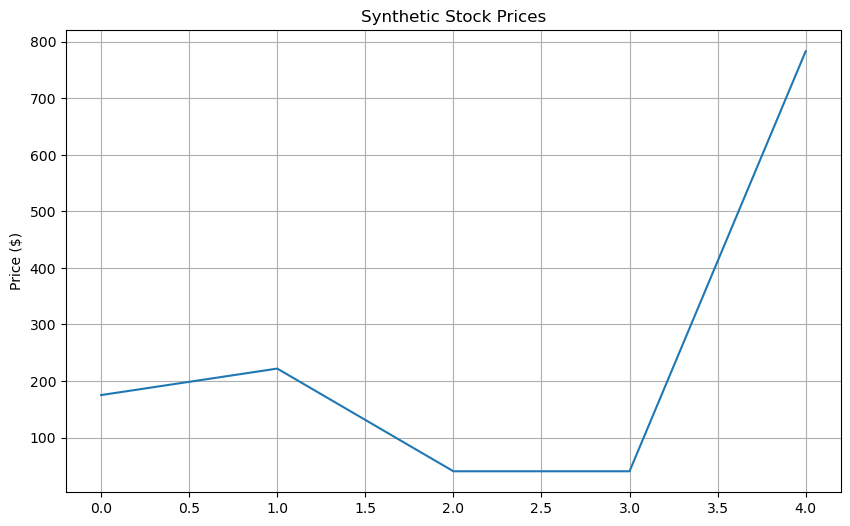

In [585]:
def generate_synthetic_data(generator, num_samples, window_size):
    noise = np.random.normal(0, 1, (num_samples, window_size, 1))
    generated_data = generator.predict(noise)
    
    # Reshape for de-normalization
    generated_data_reshaped = generated_data.reshape(-1, window_size) 
    generated_data_denorm = X_scaler.inverse_transform(generated_data_reshaped)
    
    return generated_data_denorm.reshape(num_samples, window_size, 1)

# Genera e visualizza i dati
generated_data = generate_synthetic_data(generator, 10, 5)
plt.figure(figsize=(10, 6))
plt.plot(generated_data[0])
plt.title("Synthetic Stock Prices")
plt.ylabel("Price ($)")
plt.grid(True)
plt.show()

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


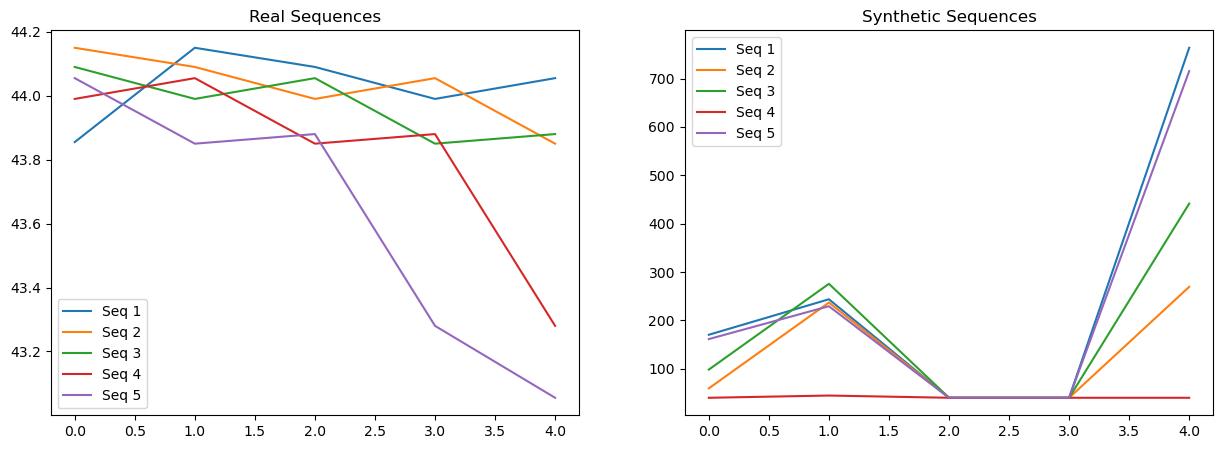

Epoch 1/100
76/76 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 18.8295 - mean_absolute_error: 188.3453 - val_loss: 33.3252 - val_mean_absolute_error: 333.3018
Epoch 2/100
76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 18.7699 - mean_absolute_error: 187.7491 - val_loss: 33.2473 - val_mean_absolute_error: 332.5229
Epoch 3/100
76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 18.9638 - mean_absolute_error: 189.6876 - val_loss: 33.1717 - val_mean_absolute_error: 331.7672
Epoch 4/100
76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 18.6773 - mean_absolute_error: 186.8232 - val_loss: 33.0854 - val_mean_absolute_error: 330.9041
Epoch 5/100
76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 18.2966 - mean_absolute_error: 183.0164 - val_loss: 32.9621 - val_mean_absolute_error: 329.6714
Epoch 6/100
76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 18.3494 - mean_absolute_error: 183.5440 - val_loss: 32.6306 - val_mean_absolute_error: 326.3562
Epoch 7/100
76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 17.9037 - m

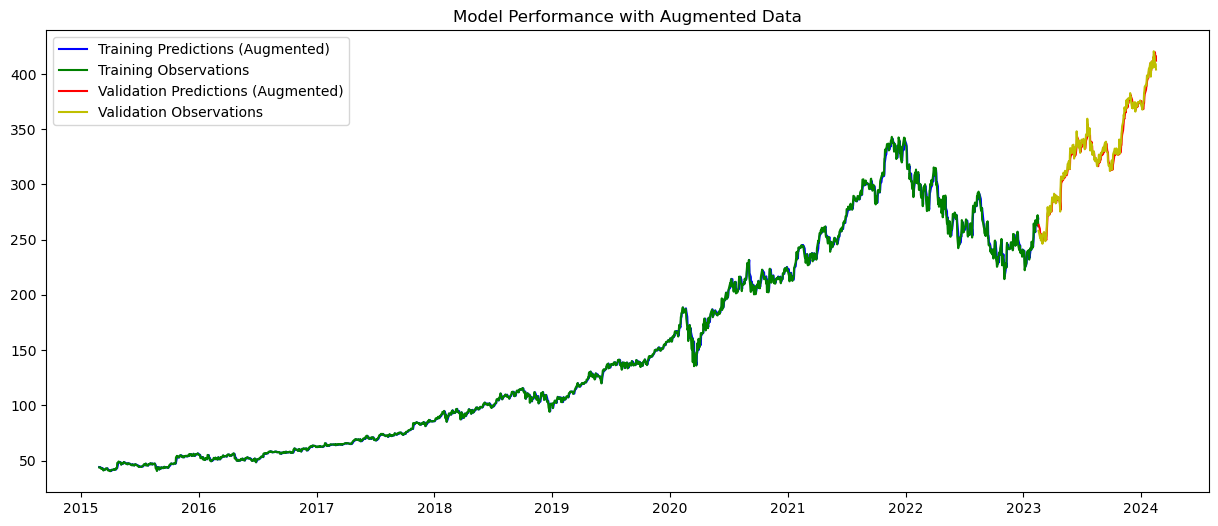

In [586]:
# 1. Prima genera i dati sintetici (dopo il train_gan e la funzione generate_synthetic_data)
num_synthetic = int(X_train.shape[0] * 0.2)  # Genera 20% di dati sintetici
synthetic_sequences = generate_synthetic_data(generator, num_synthetic, 5)

# 2. Visualizza confronto tra sequenze reali e sintetiche
plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
for i in range(5):
    plt.plot(X_train[i, :, 0], label=f'Seq {i+1}')
plt.title('Real Sequences')
plt.legend()

plt.subplot(1, 2, 2)
for i in range(5):
    plt.plot(synthetic_sequences[i, :, 0], label=f'Seq {i+1}')
plt.title('Synthetic Sequences')
plt.legend()
plt.show()

# 3. Combina i dati reali e sintetici
X_train_augmented = np.concatenate([X_train, synthetic_sequences], axis=0)
y_train_augmented = np.concatenate([y_train, synthetic_sequences[:, -1, 0]], axis=0)

# 4. Shuffle i dati (opzionale)
shuffle_idx = np.random.permutation(len(X_train_augmented))
X_train_augmented = X_train_augmented[shuffle_idx]
y_train_augmented = y_train_augmented[shuffle_idx]

# 5. Riaddestra l'LSTM con i dati aumentati
model_augmented = Sequential([
    layers.Input((5, 1)),
    layers.LSTM(64),
    layers.Dense(32, activation='relu'),
    layers.Dense(32, activation='relu'),
    layers.Dense(1)
])

model_augmented.compile(
    loss=tf.keras.losses.Huber(delta=0.1),
    optimizer=Adam(learning_rate=0.0001),
    metrics=['mean_absolute_error']
)

# Addestra il modello con i dati aumentati
history_augmented = model_augmented.fit(
    X_train_augmented, 
    y_train_augmented,
    validation_data=(X_val, y_val),
    epochs=100
)

# 6. Confronta le performance
train_predictions_aug = model_augmented.predict(X_train)
val_predictions_aug = model_augmented.predict(X_val)
test_predictions_aug = model_augmented.predict(X_test)

# Plot dei risultati
plt.figure(figsize=(15, 6))
plt.plot(dates_train, train_predictions_aug, 'b', label='Training Predictions (Augmented)')
plt.plot(dates_train, y_train, 'g', label='Training Observations')
plt.plot(dates_val, val_predictions_aug, 'r', label='Validation Predictions (Augmented)')
plt.plot(dates_val, y_val, 'y', label='Validation Observations')
plt.legend()
plt.title('Model Performance with Augmented Data')
plt.show()

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


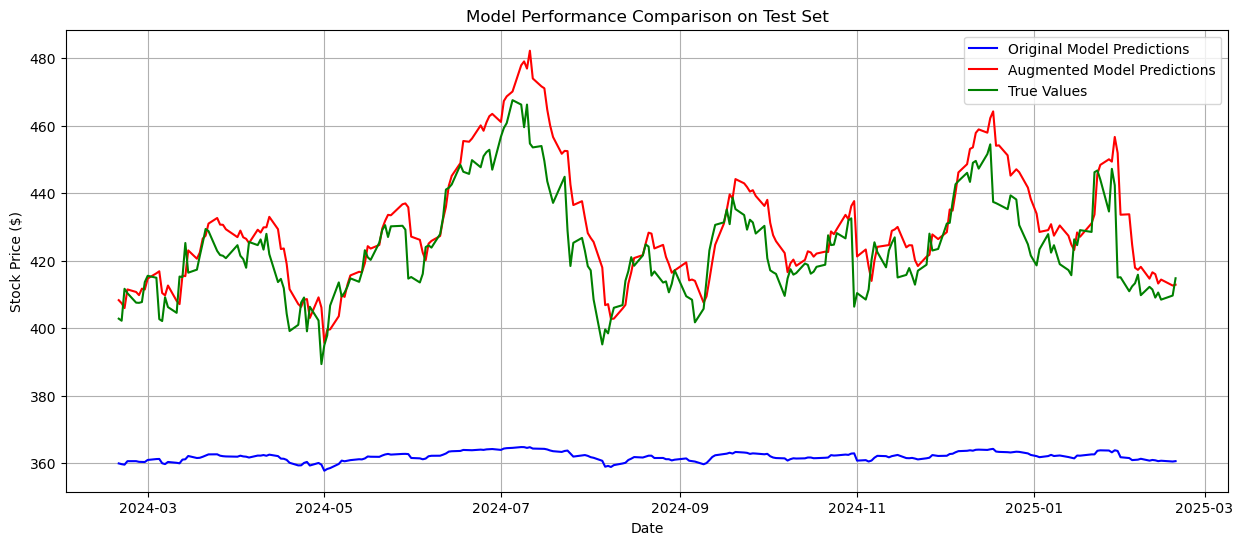


Test Set Performance Metrics:

Original Model:
MAE: $61.72
RMSE: $63.22

Augmented Model:
MAE: $7.35
RMSE: $9.64

Improvement with Data Augmentation:
MAE Improvement: 88.09%
RMSE Improvement: 84.75%


In [587]:
# 1. Fai le predizioni sul test set usando entrambi i modelli
test_predictions_original = model.predict(X_test)  # modello originale
test_predictions_augmented = model_augmented.predict(X_test)  # modello con dati aumentati

# 2. Plot di confronto
plt.figure(figsize=(15, 6))
plt.plot(dates_test, test_predictions_original, 'b', label='Original Model Predictions')
plt.plot(dates_test, test_predictions_augmented, 'r', label='Augmented Model Predictions')
plt.plot(dates_test, y_test, 'g', label='True Values')
plt.title('Model Performance Comparison on Test Set')
plt.xlabel('Date')
plt.ylabel('Stock Price ($)')
plt.legend()
plt.grid(True)
plt.show()

# 3. Calcola e confronta le metriche di errore
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Per il modello originale
mae_original = mean_absolute_error(y_test, test_predictions_original)
rmse_original = np.sqrt(mean_squared_error(y_test, test_predictions_original))

# Per il modello con dati aumentati
mae_augmented = mean_absolute_error(y_test, test_predictions_augmented)
rmse_augmented = np.sqrt(mean_squared_error(y_test, test_predictions_augmented))

print("\nTest Set Performance Metrics:")
print("\nOriginal Model:")
print(f"MAE: ${mae_original:.2f}")
print(f"RMSE: ${rmse_original:.2f}")

print("\nAugmented Model:")
print(f"MAE: ${mae_augmented:.2f}")
print(f"RMSE: ${rmse_augmented:.2f}")

# 4. Calcola la percentuale di miglioramento
mae_improvement = ((mae_original - mae_augmented) / mae_original) * 100
rmse_improvement = ((rmse_original - rmse_augmented) / rmse_original) * 100

print(f"\nImprovement with Data Augmentation:")
print(f"MAE Improvement: {mae_improvement:.2f}%")
print(f"RMSE Improvement: {rmse_improvement:.2f}%")